# GRIP : The Spark Foundation
Graduate Rotational Internship Program

## Author : Prathmesh Jagtap 

## Prediction using Decision Tree Algorithm


## Objectives

- The purpose is if we feed any new data to this classifier, it would be able to
predict the right class accordingly.


<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#about_dataset">About the dataset</a></li>
        <li><a href="#downloading_data">Loading the Data</a></li>
        <li><a href="#pre-processing">Pre-processing</a></li>
        <li><a href="#Loading the dataset">Setting up the Decision Tree</a></li>
        <li><a href="#modeling">Modeling</a></li>
        <li><a href="#prediction">Prediction</a></li>
        <li><a href="#evaluation">Evaluation</a></li>
        <li><a href="#visualization">Visualization</a></li>
    </ol>
</div>
<br>
<hr>


## Importing the Required Libraries:

In [1]:
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

<div id="Loading the dataset">
    <h2>Loading the dataset</h2>

Now, reading data using pandas dataframe:

In [2]:
iris_data = pd.read_csv("Iris (1).csv")
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
iris_data.shape

(150, 6)

In [4]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


<div href="pre-processing">
    <h2>Pre-processing</h2>
</div>


* **X  as the  Feature Matrix  (data of iris_data)**
* **y  as the  response vector (target)**


Remove the column containing the target name since it doesn't contain numeric values.


In [5]:
X = iris_data.drop(["Id", "Species"], axis=1).values
X[0:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

Now we can fill the target variable.


In [6]:
y = iris_data["Species"]
y[0:5]

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

<hr>

<div id="setting_up_tree">
    <h2>Setting up the Decision Tree</h2>
    We will be using <b>train/test split</b> on our <b>decision tree</b>. Let's import <b>train_test_split</b> from <b>sklearn.cross_validation</b>.
</div>


In [7]:
from sklearn.model_selection import train_test_split

Now  train_test_split  will return 4 different parameters. We will name them
**X_train, X_test, y_train, y_test**
The  train_test_split  will need the parameters:
X, y, test_size=0.3, and random_state=3. 
The **X** and **y** are the arrays required before the split, the test_size represents the ratio of the testing dataset, and the **random_state** ensures that we obtain the same splits.


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

Print the shape of X_test and y_test. Ensure that the dimensions match


In [9]:
# your code
print('Shape of X training set {}'.format(X_test.shape),'&',' Size of Y training set {}'.format(y_test.shape))

Shape of X training set (45, 4) &  Size of Y training set (45,)


<hr>

<div id="modeling">
    <h2>Modeling</h2>
    We will first create an instance of the <b>DecisionTreeClassifier</b> called <b>drugTree</b>.<br>
    Inside of the classifier, specify <i> criterion="entropy" </i> so we can see the information gain of each node.
</div>


In [10]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
drugTree # it shows the default parameters

DecisionTreeClassifier(criterion='entropy', max_depth=4)

Next, we will fit the data with the training feature matrix <b> X_train </b> and training  response vector <b> y_train </b>


In [11]:
drugTree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

<hr>

<div id="prediction">
    <h2>Prediction</h2>
    Let's make some <b>predictions</b> on the testing dataset and store it into a variable called <b>predTree</b>.
</div>


In [12]:
predTree = drugTree.predict(X_test)

You can print out <b>predTree</b> and <b>y_test</b> if you want to visually compare the prediction to the actual values.

In [13]:
print (predTree [0:5])
print (y_test [0:5])


['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa']
47    Iris-setosa
3     Iris-setosa
31    Iris-setosa
25    Iris-setosa
15    Iris-setosa
Name: Species, dtype: object


<hr>

<div id="evaluation">
    <h2>Evaluation</h2>
    Next, let's import <b>metrics</b> from sklearn and check the accuracy of our model.
</div>


In [14]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

DecisionTrees's Accuracy:  0.8888888888888888


**Accuracy classification score** computes subset accuracy: the set of labels predicted for a sample must exactly match the corresponding set of labels in y_true.  

In multilabel classification, the function returns the subset accuracy. If the entire set of predicted labels for a sample strictly match with the true set of labels, then the subset accuracy is 1.0; otherwise it is 0.0.


<hr>

<div id="visualization">
    <h2>Visualization</h2>
    
    
Lets visualize the tree
</div>


[Text(313.875, 489.24, 'X[2] <= 2.45\nentropy = 1.584\nsamples = 105\nvalue = [33, 36, 36]'),
 Text(209.25, 380.52000000000004, 'entropy = 0.0\nsamples = 33\nvalue = [33, 0, 0]'),
 Text(418.5, 380.52000000000004, 'X[2] <= 4.75\nentropy = 1.0\nsamples = 72\nvalue = [0, 36, 36]'),
 Text(209.25, 271.8, 'X[0] <= 4.95\nentropy = 0.191\nsamples = 34\nvalue = [0, 33, 1]'),
 Text(104.625, 163.08000000000004, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(313.875, 163.08000000000004, 'entropy = 0.0\nsamples = 33\nvalue = [0, 33, 0]'),
 Text(627.75, 271.8, 'X[2] <= 5.15\nentropy = 0.398\nsamples = 38\nvalue = [0, 3, 35]'),
 Text(523.125, 163.08000000000004, 'X[1] <= 3.05\nentropy = 0.75\nsamples = 14\nvalue = [0, 3, 11]'),
 Text(418.5, 54.360000000000014, 'entropy = 0.439\nsamples = 11\nvalue = [0, 1, 10]'),
 Text(627.75, 54.360000000000014, 'entropy = 0.918\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(732.375, 163.08000000000004, 'entropy = 0.0\nsamples = 24\nvalue = [0, 0, 24]')]

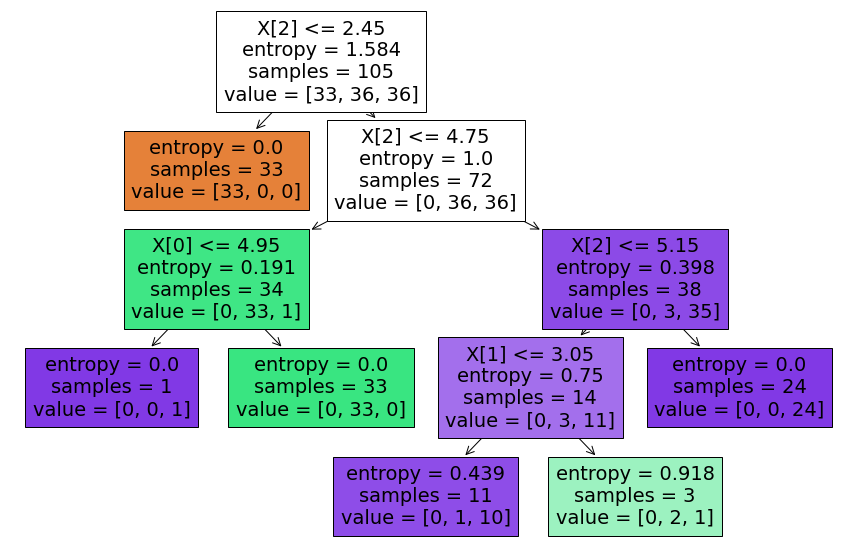

In [28]:
plt.figure(figsize=(15,10))
tree.plot_tree(drugTree, filled=True) 